In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
680,ham,What is this 'hex' place you talk of? Explain!,NaN,NaN,NaN
1976,ham,Lol alright i was thinkin that too haha,NaN,NaN,NaN
2540,ham,"They said if its gonna snow, it will start aro...",NaN,NaN,NaN
2264,ham,Ok . . now i am in bus. . If i come soon i wil...,NaN,NaN,NaN
4747,ham,The beauty of life is in next second.. which h...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Processing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.sample(5)

,v1,v2
4383,ham,Thanks honey but still haven't heard anything ...
2646,ham,"Em, its olowoyey@ usc.edu have a great time in..."
4483,ham,Shopping? Eh ger i toking abt syd leh...Haha
4700,ham,I liked the new mobile
4727,ham,I (Career Tel) have added u as a contact on IN...


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace =True)

In [11]:
df.sample(5)

,target,text
3151,spam,Hard LIVE 121 chat just 60p/min. Choose your g...
3398,ham,"Yeah we wouldn't leave for an hour at least, h..."
887,ham,Y dun cut too short leh. U dun like ah? She fa...
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...
253,ham,"Ups which is 3days also, and the shipping comp..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

df.sample(5)

In [13]:
df.sample(5)

,target,text
4653,0,Hope you are having a great day.
4736,0,Nt only for driving even for many reasons she ...
1313,0,How abt making some of the pics bigger?
2814,0,Some are lasting as much as 2 hours. You might...
288,0,"My life Means a lot to me, Not because I love ..."


In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep="first")

In [16]:
df.shape

(5169, 2)

# 2. EDA

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

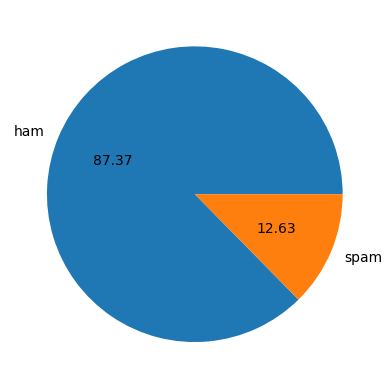

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%-.2f")
plt.show()

In [19]:
!pip install nltk


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df["num_words"] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df["num_sentences"] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


C:\Users\Maaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

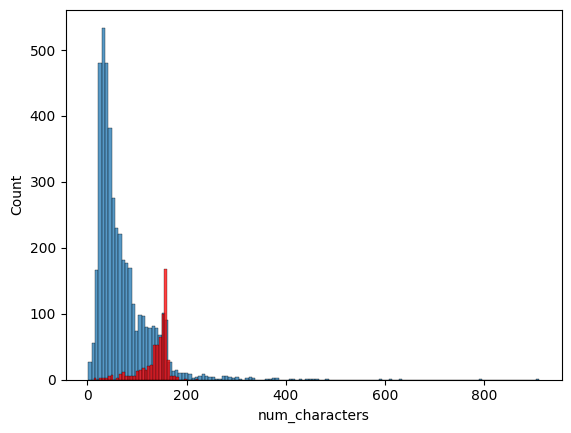

In [29]:
import seaborn as sns
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color="red")

# 3. Preprocessing
i. lowercase
ii. tokenize
iii. remove special characters
iv. removing stop words and punctuation
v. stemming

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
# stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [32]:
transform_text('I loved the youtube lectures on machine learning how about you !')

'love youtub lectur machin learn'

In [33]:
df["transformed_text"] = df["text"].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [36]:
 spam_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

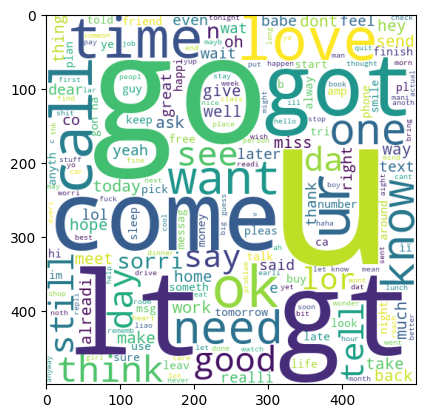

In [37]:
plt.imshow(spam_wc)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
spam_corpus =[]
for msg in df[df["target"]==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

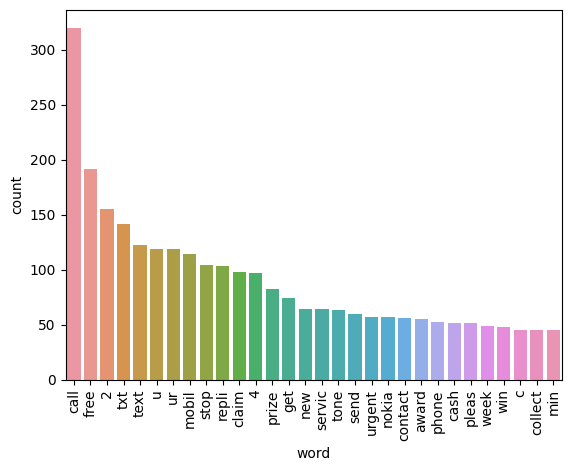

In [40]:
from collections import Counter
# pd.DataFrame(Counter(spam_corpus).most_common(30))
# Create a DataFrame for the most common 30 words in the corpus
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [42]:
len(ham_corpus)

35404

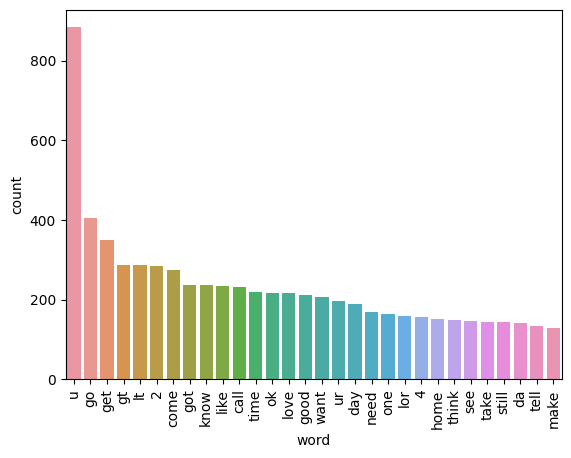

In [43]:
from collections import Counter
# pd.DataFrame(Counter(spam_corpus).most_common(30))
# Create a DataFrame for the most common 30 words in the corpus
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [67]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [47]:
y  = df["target"].values

In [48]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split



In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [70]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [75]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [76]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb') )